<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [104]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Use this space to rename columns, deal with missing data, etc. _(optional)_

In [112]:
df.columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
type(np.NaN)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  167
TOTAL_REVENUE                   125
FEDERAL_REVENUE                 125
STATE_REVENUE                   125
LOCAL_REVENUE                   125
TOTAL_EXPENDITURE               125
INSTRUCTION_EXPENDITURE         125
SUPPORT_SERVICES_EXPENDITURE    125
OTHER_EXPENDITURE               167
CAPITAL_OUTLAY_EXPENDITURE      125
ENROLL_PREK                      78
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  167
ENROLL_HS                       116
ENROLL_ALL                       74
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  1
AVG_READING_4_SCORE              44
AVG_READING_8_SCORE              87
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(Math 4 grade)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [56]:
#store the list of unique values in the YEAR column
uniqueYears = df["YEAR"].unique()
#find the lenghth of that list
len(uniqueYears)

33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [57]:
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].mean()
#Michigan = 234.363636
#Ohio = 239.454545
#Ohio has the higher average predictor score

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your pedictor score across all states in 2019

In [58]:
years = df.groupby("YEAR")
years["AVG_MATH_8_SCORE"].mean()
#281.264151

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990    263.000000
1991           NaN
1992    266.325581
1993           NaN
1994           NaN
1995           NaN
1996    270.000000
1997           NaN
1998           NaN
1999           NaN
2000    271.404762
2001           NaN
2002           NaN
2003    276.943396
2004           NaN
2005    277.867925
2006           NaN
2007    280.773585
2008           NaN
2009    282.509434
2010           NaN
2011    283.584906
2012           NaN
2013    284.113208
2014           NaN
2015    281.905660
2016           NaN
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [59]:
states["AVG_MATH_4_SCORE"].max()


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

Final feature list: **<TOTAL_REVENUE, TOTAL_EXPENDITURE, INSTRUCTION_EXPENDITURE\>**

Feature selection justification: **<If more is spent, that could mean more is spent towards better classrooms enviroments, better teachers, better supplies, etc\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Scatterplot of 4th grade math scores')

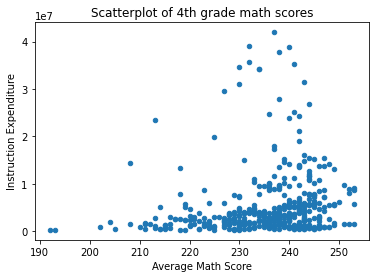

In [60]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='INSTRUCTION_EXPENDITURE')
plt.xlabel('Average Math Score')
plt.ylabel('Instruction Expenditure')
plt.title('Scatterplot of 4th grade math scores')

**<"Average math score for 4th graders by Instruction expenditure>**

**Visualization 2**

Text(0.5, 1.0, 'Scatterplot of 4th grade math scores')

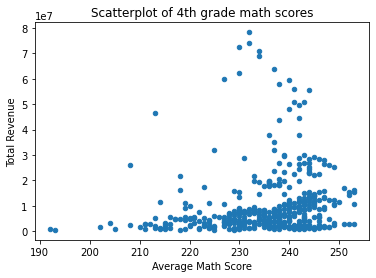

In [61]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='TOTAL_REVENUE')
plt.xlabel('Average Math Score')
plt.ylabel('Total Revenue')
plt.title('Scatterplot of 4th grade math scores')

**<"Average math score for 4th graders by Total revenue">**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [123]:
from sklearn.model_selection import train_test_split

In [131]:
df.dropna()
X = df[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE','TOTAL_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [133]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [134]:
# create your model here
model = LinearRegression()

In [135]:
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)

In [140]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Math 8 Score')

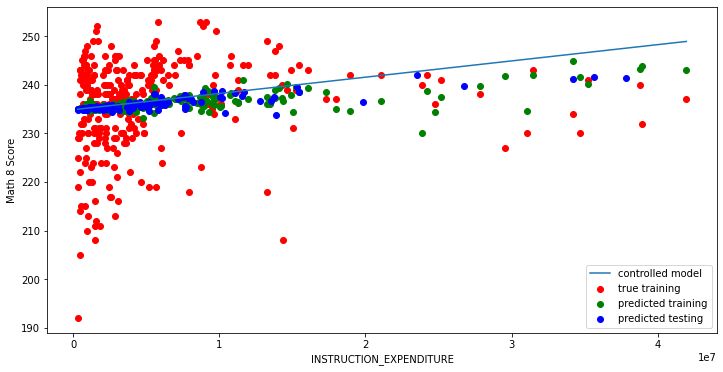

In [139]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

In [141]:
print(model.intercept_)
print(model.coef_)

234.8725844628413
[ 1.84932529e-06  3.34985556e-07 -1.89961974e-06]


In [142]:
model.score(X_test, y_test)

0.013385878966842624

In [143]:
np.mean(model.predict(X_test)-y_test)

1.303035113270715

In [145]:
np.mean(np.abs(model.predict(X_test)-y_test))

8.475575354695087

In [146]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

10.957541799807935

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
The model intercept is a 4th grade math score of 234.8725844628413.
Since the r value of 0.013385878966842624 is very low, it is fair to say that there is no linear relationship between average 4th grade math score and the variables I looked at like Instruction Expenditure. To add to these values, the scatterplots I've created show that there is likely no correlation between any of the variables. 